In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [2]:
from sklearn.linear_model import LogisticRegression
X,y=make_blobs(random_state=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression(max_iter=10000).fit(X_train,y_train)
print("Test set score: {}".format(logreg.score(X_test,y_test)))

Test set score: 0.88


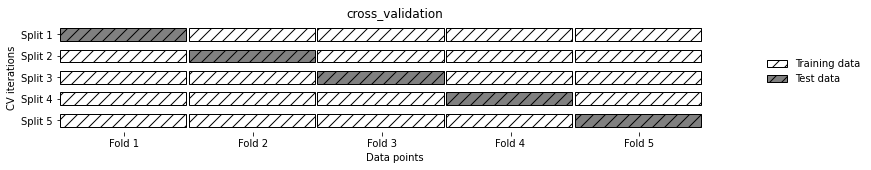

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris=load_iris()
logreg=LogisticRegression(max_iter=10000)

scores=cross_val_score(logreg,iris.data,iris.target,cv=7,n_jobs=-1)
print("Cross-validation score: {}".format(scores))

Cross-validation score: [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


In [5]:
print("Average cross-val score: {}".format(scores.mean()))

Average cross-val score: 0.9669140383426098


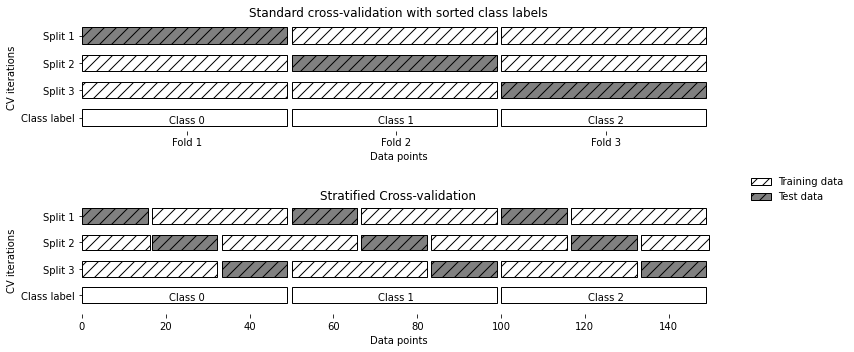

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [7]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [8]:
kfold=KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [9]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
print("Cross-validation scores:\n{}".format(
cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [10]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(logreg,iris.data,iris.target,cv=loo,n_jobs=-1)
print("Number of cv iterations: {}".format(len(scores)))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations: 150
Mean accuracy: 0.97


In [11]:
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split,n_jobs=-1)
np.set_printoptions(precision=3)
print("Cross-validation shuffle-split score: {}".format(scores))

Cross-validation shuffle-split score: [0.947 0.933 0.933 0.973 0.973 0.973 0.947 0.96  0.987 0.96 ]


In [12]:
from sklearn.model_selection import GroupKFold
X,y=make_blobs(n_samples=12,random_state=0)
groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores=cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75  0.6   0.667]


In [13]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set: {}  size of the test set: {}".format(X_train.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)
        if score > best_score:
            best_score=score
            best_parameters={"gamma":gamma,"C":C}
print("Best Score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112  size of the test set: 38
Best Score: 0.97
Best parameters: {'gamma': 0.001, 'C': 100}


In [14]:
X_trainval,X_test,y_trainval,y_test=train_test_split(iris.data,iris.target,random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=0)
print("Size of training set: {} size of validation set: {}  size of the test set: {}".format(
    X_train.shape[0],X_valid.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_valid,y_valid)
        if score > best_score:
            best_score=score
            best_parameters={"gamma":gamma,"C":C}
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
print("Best Score on vlidation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28  size of the test set: 38
Best Score on vlidation set: 1.00
Best parameters: {'gamma': 0.001, 'C': 100}
Test set score with best parameters: 0.97


In [15]:
from sklearn.model_selection import cross_val_score
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        scores=cross_val_score(svm,X_valid,y_valid,cv=5)
        score=np.mean(scores)
        if score > best_score:
            best_score=score
            best_parameters={"gamma":gamma,"C":C}
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
print("Best Score on vlidation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best Score on vlidation set: 1.00
Best parameters: {'gamma': 0.001, 'C': 100}
Test set score with best parameters: 0.97


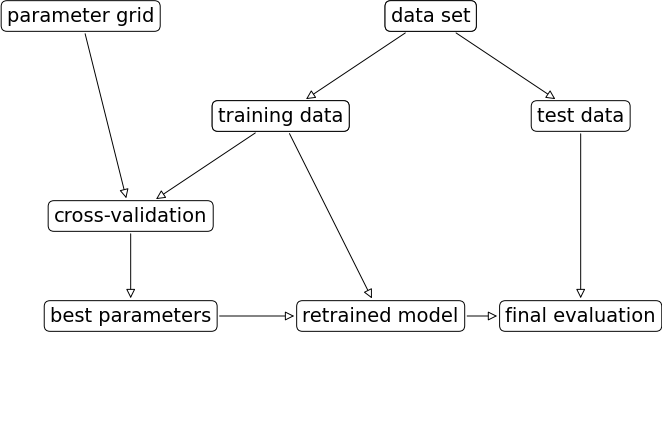

In [16]:
mglearn.plots.plot_grid_search_overview()

In [17]:
param_grid={"gamma" :[0.001,0.01,0.1,1,10,100],"C":[0.001,0.01,0.1,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

In [20]:
grid_search.fit(X_train,y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test,y_test)))

Test set score: 0.97


In [21]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [22]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [23]:
results=pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0006,4.898625e-04,0.0004,0.000490,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.0010,3.873843e-07,0.0004,0.000490,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.0006,4.898626e-04,0.0004,0.000489,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.0008,3.998996e-04,0.0002,0.000400,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.0006,4.900183e-04,0.0004,0.000490,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


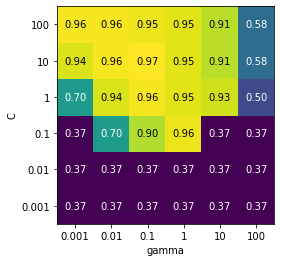

In [24]:
scores=np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores,xlabel="gamma",xticklabels=param_grid["gamma"],ylabel="C",
                      yticklabels=param_grid["C"],cmap="viridis")

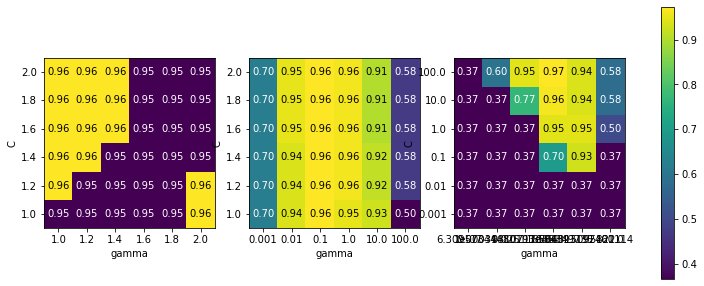

In [25]:
fig,axes=plt.subplots(1,3,figsize=(13,5))
param_grid_linear={"C":np.linspace(1,2,6),"gamma":np.linspace(1,2,6)}
param_grid_one_log={"C":np.linspace(1,2,6),"gamma":np.logspace(-3,2,6)}
param_grid_range={"C":np.logspace(-3,2,6),"gamma":np.logspace(-7,2,6)}

for param_grid,ax in zip([param_grid_linear,param_grid_one_log,param_grid_range],axes):
    grid_search=GridSearchCV(SVC(),param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores=grid_search.cv_results_["mean_test_score"].reshape(6,6)
    scores_image=mglearn.tools.heatmap(scores,xlabel="gamma",xticklabels=param_grid["gamma"],ylabel="C",
                      yticklabels=param_grid["C"],cmap="viridis",ax=ax)
plt.colorbar(scores_image,ax=axes.tolist())

In [26]:
param_grid=[{"kernel":["rbf"],"gamma" :[0.001,0.01,0.1,1,10,100],"C":[0.001,0.01,0.1,1,10,100]},
           {"kernel":["linear"],"C":[0.001,0.01,0.1,1,10,100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [27]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_) )

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [28]:
results=pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000999,1.784161e-07,0.000200,0.000400,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
1,0.000801,4.005297e-04,0.000600,0.000490,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
2,0.000803,4.016669e-04,0.000196,0.000393,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
3,0.000598,4.884588e-04,0.000401,0.000491,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
4,0.000997,4.271354e-06,0.000000,0.000000,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
5,0.001001,1.489687e-06,0.000000,0.000000,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
6,0.000603,4.925921e-04,0.000396,0.000486,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
7,0.000800,3.999235e-04,0.000200,0.000400,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
8,0.000600,4.896289e-04,0.000396,0.000485,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27
9,0.000600,4.899795e-04,0.000200,0.000400,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,27


In [29]:
scores=cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)
print("Cross-validation scores: ",scores)
print("Mean cross-validation score: ",scores.mean())

Cross-validation scores:  [0.967 1.    0.9   0.967 1.   ]
Mean cross-validation score:  0.9666666666666668


In [30]:
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target==9
X_train, X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)

In [31]:
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test,y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test,y_test)))

Test score: 0.92


In [33]:
from sklearn.linear_model import LogisticRegression

dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
print("dummy Test score: {:.2f}".format(dummy.score(X_test,y_test)))

logreg=LogisticRegression(C=0.1,max_iter=10000).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print("logreg Test score: {:.2f}".format(logreg.score(X_test,y_test)))

dummy Test score: 0.81
logreg Test score: 0.98


C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [34]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


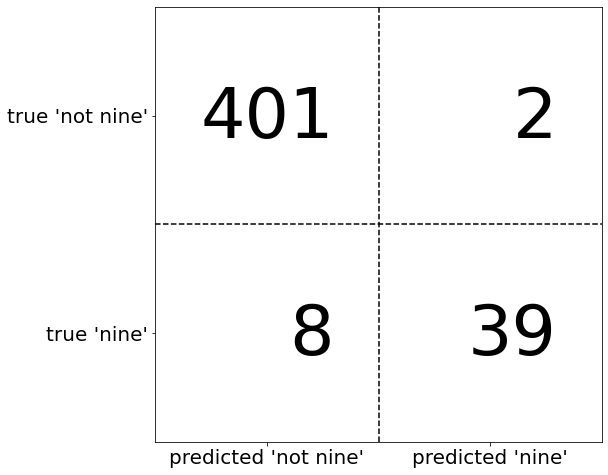

In [35]:
mglearn.plots.plot_confusion_matrix_illustration()

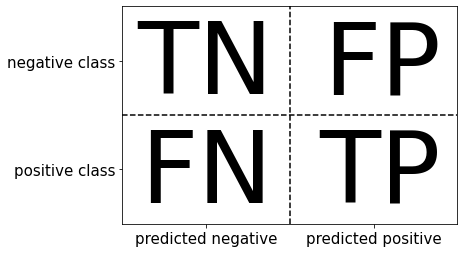

In [36]:
mglearn.plots.plot_binary_confusion_matrix()

In [37]:
print("Most frequent class:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test,pred_dummy))
print("\nDecision Tree:")
print(confusion_matrix(y_test,pred_tree))
print("\nLogisticRegression:")
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[355  48]
 [ 40   7]]

Decision Tree:
[[390  13]
 [ 24  23]]

LogisticRegression:
[[402   1]
 [  6  41]]


In [38]:
from sklearn.metrics import f1_score
print("f1 score Most frequent class:")
print(f1_score(y_test,pred_most_frequent))
print("\nf1 score  Dummy model:")
print(f1_score(y_test,pred_dummy))
print("\nf1 score  Decision Tree:")
print(f1_score(y_test,pred_tree))
print("\nf1 score  LogisticRegression:")
print(f1_score(y_test,pred_logreg))

f1 score Most frequent class:
0.0

f1 score  Dummy model:
0.1372549019607843

f1 score  Decision Tree:
0.5542168674698795

f1 score  LogisticRegression:
0.9213483146067415


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_logreg,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [40]:
print(classification_report(y_test,pred_most_frequent,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
print(classification_report(y_test,pred_tree,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [61]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=(400,50),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=0.05).fit(X_train,y_train)
svc.score(X_test,y_test)

0.8761061946902655

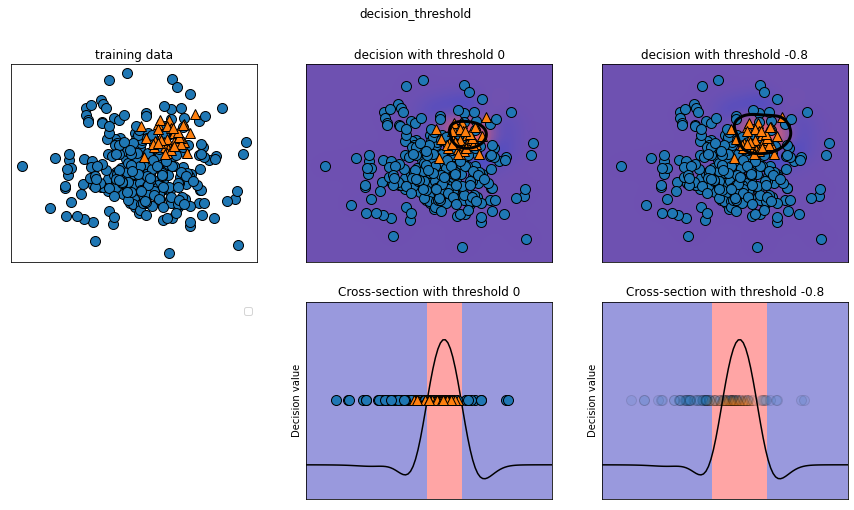

In [48]:
mglearn.plots.plot_decision_threshold()

In [62]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [63]:
y_pred_lower_threshold=svc.decision_function(X_test)>-.8
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



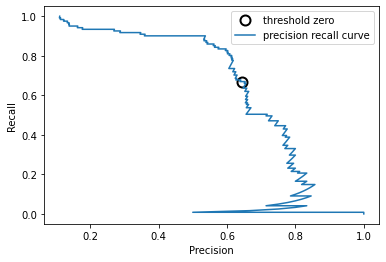

In [66]:
from sklearn.metrics import precision_recall_curve
X,y=make_blobs(n_samples=(4000,500),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=0.05).fit(X_train,y_train)
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",
         fillstyle='none',c="k",mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

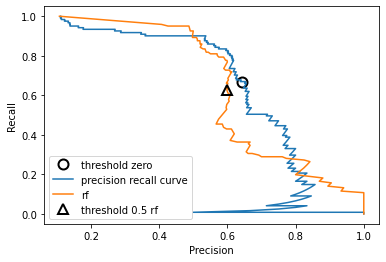

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)
precision_rf,recall_rf,thresholds_rf=precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))

plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",
         fillstyle='none',c="k",mew=2)
plt.plot(precision,recall,label="precision recall curve")

plt.plot(precision_rf,recall_rf,label="rf")
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c="k",markersize=10,
        label="threshold 0.5 rf",fillstyle="none",mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [68]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test,rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test,svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [75]:
from sklearn.metrics import average_precision_score
ap_rf=average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc=average_precision_score(y_test,svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of SVC: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of SVC: 0.666


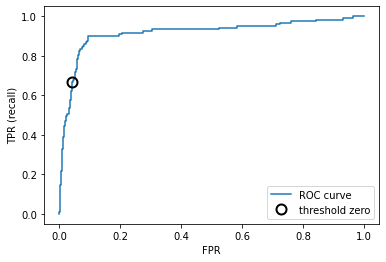

In [76]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,
         label="threshold zero",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

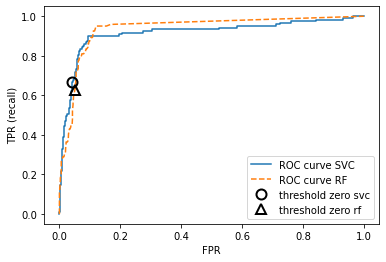

In [84]:
from sklearn.metrics import roc_curve
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(fpr,tpr,label="ROC curve SVC")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf,tpr_rf,label="ROC curve RF",ls='--')
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,
         label="threshold zero svc",fillstyle="none",c='k',mew=2)
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'^',markersize=10,
         label="threshold zero rf",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

In [85]:
from sklearn.metrics import roc_auc_score
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print("AUC of random forest: {:.3f}".format(rf_auc))
print("AUC of SVC: {:.3f}".format(svc_auc))

AUC of random forest: 0.937
AUC of SVC: 0.916


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


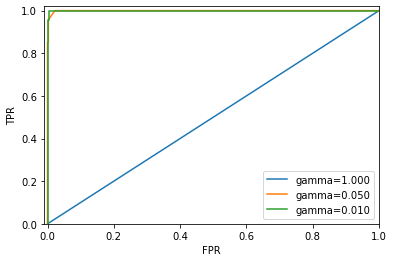

In [87]:
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
plt.figure()
for gamma in [1,0.05,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_=roc_curve(y_test,svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc="best")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_digits

digits=load_digits()
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)
lr=LogisticRegression().fit(X_train,y_train)
pred=lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test,pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\Daniel\anaconda3\envs\py37ml\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


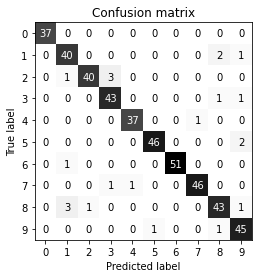

In [4]:
scores_image=mglearn.tools.heatmap(confusion_matrix(y_test,pred),xlabel="Predicted label",
                                  ylabel="True label",xticklabels=digits.target_names,
                                  yticklabels=digits.target_names,cmap=plt.cm.gray_r,fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [5]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [12]:
from sklearn.metrics import f1_score
print("Macro average f1 score: {:.3f}".format(f1_score(y_test,pred,average="macro")))
print("Micro average f1 score: {:.3f}".format(f1_score(y_test,pred,average="micro")))
print("weighted average f1 score: {:.3f}".format(f1_score(y_test,pred,average="weighted")))

Macro average f1 score: 0.017
Micro average f1 score: 0.082
weighted average f1 score: 0.151


In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC

print("Default scoring: {}".format(cross_val_score(SVC(),digits.data,digits.target==9)))
explicit_accuracy=cross_val_score(SVC(),digits.data,digits.target==9,scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc=cross_val_score(SVC(),digits.data,digits.target==9,scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [9]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target==9,random_state=0)

param_grid={'gamma':[0.0001,0.01,0.1,1,10]}
grid=GridSearchCV(SVC(),param_grid=param_grid)
grid.fit(X_train,y_train)
print("Grid search with accuracy")
print("Best parameters: ",grid.best_params_)
print("Best crossvalidation score (accuracy): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test,grid.decision_function(X_test))))
print("test set accuracy: {:.3f}".format(grid.score(X_test,y_test)))

Grid search with accuracy
Best parameters:  {'gamma': 0.0001}
Best crossvalidation score (accuracy): 0.976
Test set AUC: 0.992
test set accuracy: 0.973


In [11]:
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring="roc_auc")
grid.fit(X_train,y_train)
print("Grid search with auc")
print("Best parameters: ",grid.best_params_)
print("Best crossvalidation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test,grid.decision_function(X_test))))
print("test set accuracy: {:.3f}".format(grid.score(X_test,y_test)))

Grid search with auc
Best parameters:  {'gamma': 0.01}
Best crossvalidation score (AUC): 0.998
Test set AUC: 1.000
test set accuracy: 1.000


In [16]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
